# Subscription Predictor
The provided data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Attribute Information:

### Input variables:

#### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

*NOTE - Data from the site was in comma-seperated csv format it was changed to excell sheet manually*

## Applications of this Project  

1. This Predictive Analysis of Data will help the user industry to plan there campaigns according to the previous data these predictions will help understand what the campaign should focus on and what should not to. 

2. It will simplyfy the methods of Approaching the customers and will also give exact customers to whom company should approch what kind of people the should keep in target will nbe known by using this project.

3. It also gives you details how much time company should focus on an XYZ pperson so that he is convinced to subscribe to there plans.

4. Most Imp Use Of This Project is - It will Save TIME of Campaign as well as the company as, all work will be focused on correct targets.

5. Who Can Use This Project Rather Than Banks? Answers is It has no limits, any company selling products can use this as it can use there data of calls of customers and predict will he be interested in there product.

SO LETS BEGIN!!!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
# importing basic but imp libraries.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [4]:
# reading data file as 'Data' 
Data = pd.read_csv("../../Data/bank-additional-full.csv",sep = ';')

In [5]:
Data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# 1st Problem here with this data was that it was having Yes/No
# as its values which was needed to be converted to 1/0 for Machine Learning purpose
Data.replace(('yes','no'),(1,0),inplace=True)

In [7]:
Data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
# 2nd Major issue here was the Data was having 'unknown' as value instead of 'NaN'
# Replacing 'unknown' to 'NaN'
Data.replace('unknown',np.nan,inplace=True)

In [9]:
Data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,NaN,NaN,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
Data.groupby('job').count()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,,,,,,,,,,
admin.,10422,10408,10173,9129,10195,10195,10422,10422,10422,10422,10422,10422,10422,10422,10422,10422,10422,10422,10422,10422
blue-collar,9254,9240,8800,6088,9014,9014,9254,9254,9254,9254,9254,9254,9254,9254,9254,9254,9254,9254,9254,9254
entrepreneur,1456,1453,1399,1155,1420,1420,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456,1456
housemaid,1060,1057,1018,741,1031,1031,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060
management,2924,2921,2801,2466,2853,2853,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924,2924
retired,1720,1715,1622,1327,1676,1676,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720
self-employed,1421,1416,1392,1139,1381,1381,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421,1421
services,3969,3963,3819,3053,3868,3868,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969,3969
student,875,874,708,771,852,852,875,875,875,875,875,875,875,875,875,875,875,875,875,875


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
# Dropping "NaN's"
Data.dropna(inplace=True)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  float64
 5   housing         30488 non-null  float64
 6   loan            30488 non-null  float64
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

## Understanding and Manipulating Data

<AxesSubplot:xlabel='default', ylabel='count'>

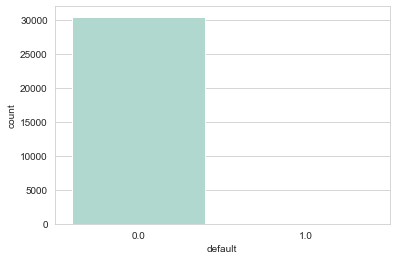

In [13]:
# checking on 'default' values from the Data
sns.set_style('whitegrid')
sns.countplot(x='default',data=Data,palette='BuGn')

In [14]:
# as we can see here all data is 0;
#dropping 'default' column from Data
Data.drop('default',axis=1,inplace=True)

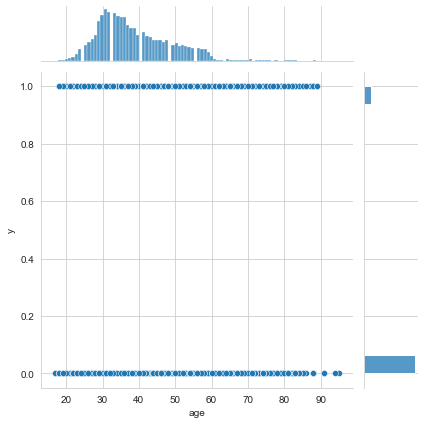

In [15]:
# Checking 'age' Values relation with 'y'
sns.jointplot(data=Data,x=Data['age'],y=Data['y'],kind='scatter')

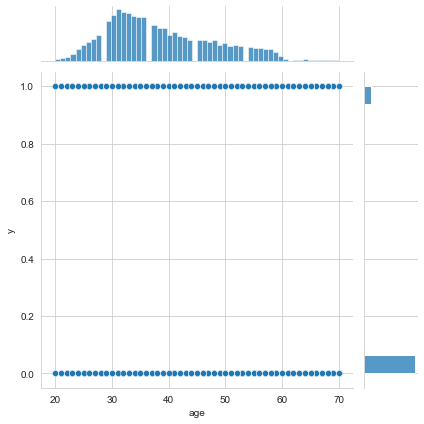

In [16]:
# as we can see Data is focused between age>20 and age<70
# so I added a restriction to Data for Age

indexNames = Data[Data['age']<20].index
Data.drop(indexNames, inplace=True)
indexNames = Data[Data['age']>70].index
Data.drop(indexNames, inplace=True)
sns.jointplot(data=Data,x=Data['age'],y=Data['y'],kind='scatter')

In [17]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30114 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30114 non-null  int64  
 1   job             30114 non-null  object 
 2   marital         30114 non-null  object 
 3   education       30114 non-null  object 
 4   housing         30114 non-null  float64
 5   loan            30114 non-null  float64
 6   contact         30114 non-null  object 
 7   month           30114 non-null  object 
 8   day_of_week     30114 non-null  object 
 9   duration        30114 non-null  int64  
 10  campaign        30114 non-null  int64  
 11  pdays           30114 non-null  int64  
 12  previous        30114 non-null  int64  
 13  poutcome        30114 non-null  object 
 14  emp.var.rate    30114 non-null  float64
 15  cons.price.idx  30114 non-null  float64
 16  cons.conf.idx   30114 non-null  float64
 17  euribor3m       30114 non-null 

In [18]:
Data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,1.0,0.0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,1.0,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0.0,0.0,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Checking If Maritial Status had any effect on OutPut
But to check soo,we first need to convert the data to its equallent format
as 

Marital had 3 classes - 'divorced','married','single'
Encoding it as 1,2,3

In [19]:
Data.replace(('divorced','married','single'),(1,2,3),inplace=True)

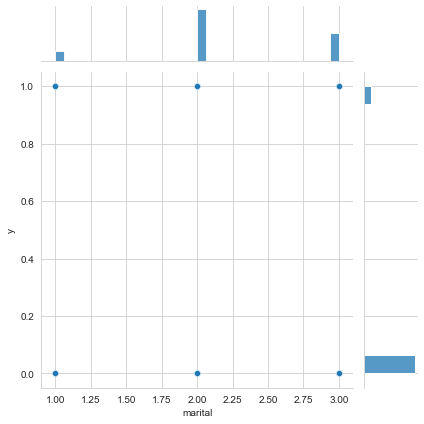

In [20]:
sns.jointplot(data=Data,x=Data['marital'],y=Data['y'],kind='scatter')

<AxesSubplot:xlabel='marital', ylabel='count'>

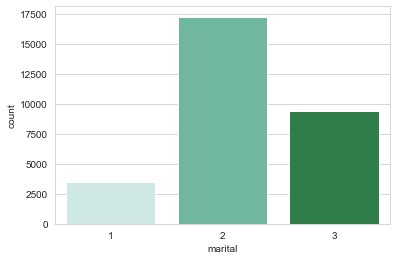

In [21]:
sns.countplot(x='marital',data=Data,palette='BuGn')

Marital colums has min effect on output so we can drop this column

In [22]:
Data.drop('marital',inplace=True,axis=1)

Similar to 'marital', 'job' and 'education' were also needed to be encoded 
so encoding 'education' and then 'job'

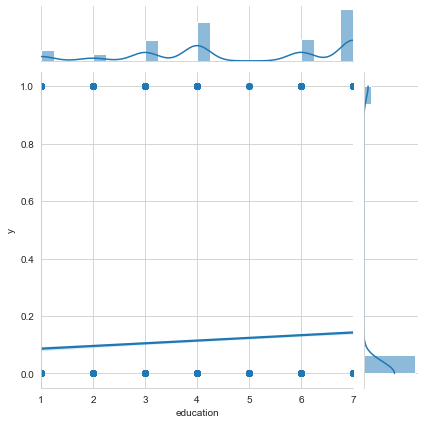

In [23]:
Data.replace(("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree"),(1,2,3,4,5,6,7),inplace=True)
sns.jointplot(data=Data,x=Data['education'],y=Data['y'],kind='reg')

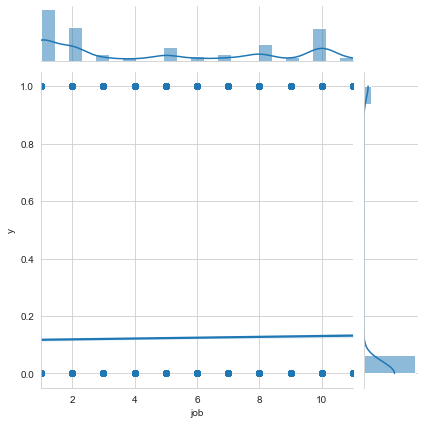

In [24]:
Data.replace(("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed"),(1,2,3,4,5,6,7,8,9,10,11),inplace=True)
sns.jointplot(data=Data,x=Data['job'],y=Data['y'],kind='reg')

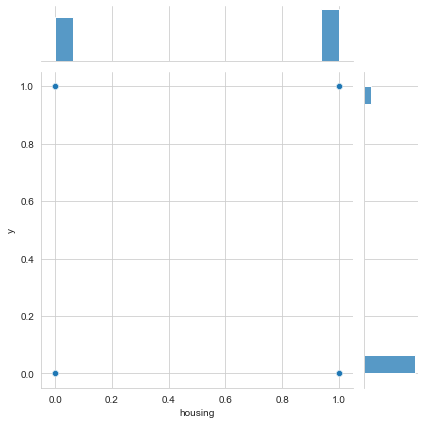

In [25]:
#checking relation og 'housing' with 'y'
sns.jointplot(data=Data,x=Data['housing'],y=Data['y'],kind='scatter')

<AxesSubplot:xlabel='loan', ylabel='count'>

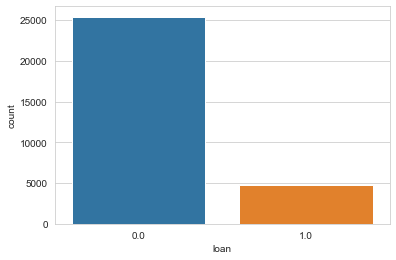

In [26]:
# checking 'loan' column
sns.countplot(x='loan',data=Data)

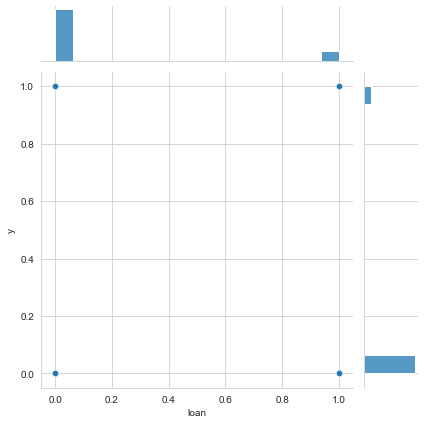

In [27]:
sns.jointplot(data=Data,x=Data['loan'],y=Data['y'],kind='scatter')

Method of Contact is no use for prediction so directly dropping it


In [28]:
Data.drop('contact',axis=1,inplace=True)

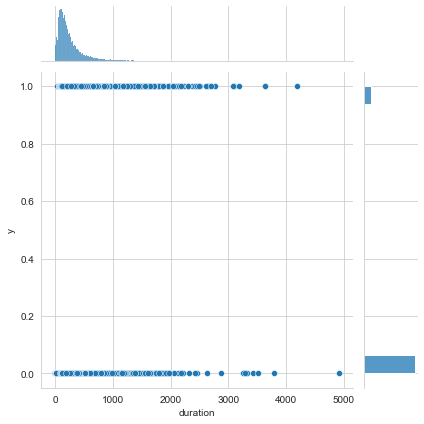

In [29]:
#checking relation of 'duration of contact' with 'y'
sns.jointplot(data=Data,x=Data['duration'],y=Data['y'],kind='scatter')

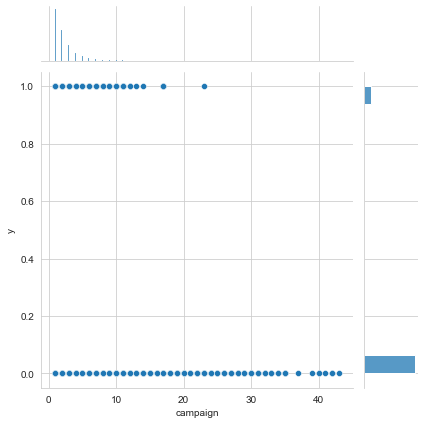

In [30]:
#checking relation of 'campaign' with 'y'
# campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
sns.jointplot(data=Data,x=Data['campaign'],y=Data['y'],kind='scatter')

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
not usefull so dropping

In [31]:
Data.drop('pdays',axis=1,inplace=True)

previous: number of contacts performed before this campaign and for this client (numeric)
checking with 'previous' column

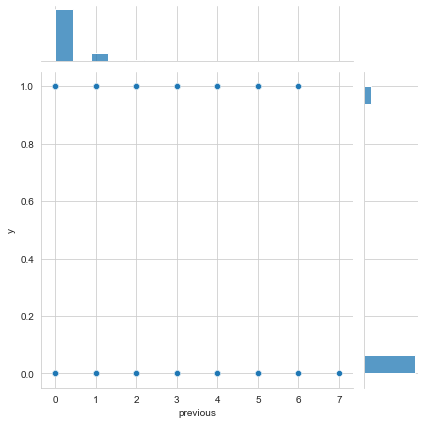

In [32]:
sns.jointplot(data=Data,x=Data['previous'],y=Data['y'],kind='scatter')

It has Some Relation so we will keep it 


Similar to 'education','job','marital', 'previous outcome' also needs  to be encoded 
so encoding it and checking relation with 'y'

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

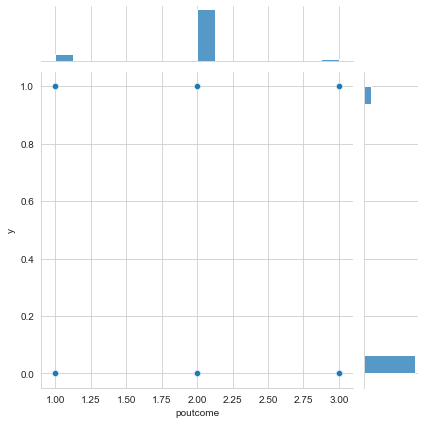

In [33]:
Data.replace(("failure","nonexistent","success"),(1,2,3),inplace=True)
sns.jointplot(data=Data,x=Data['poutcome'],y=Data['y'],kind='scatter')

keeping it as it is and as well as checking relation of 'y' with -
1. emp.var.rate: employment variation rate - quarterly indicator (numeric)

2. cons.price.idx: consumer price index - monthly indicator (numeric)

3. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

4. euribor3m: euribor 3 month rate - daily indicator (numeric)

5. nr.employed: number of employees - quarterly indicator (numeric)

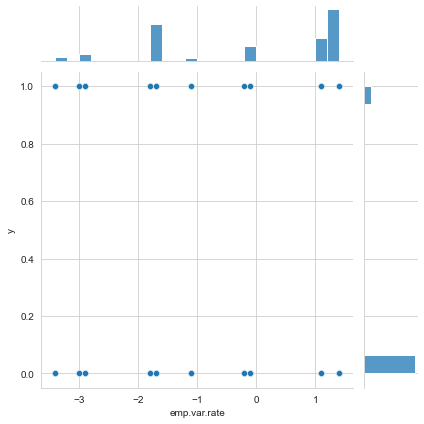

In [34]:
sns.jointplot(data=Data,x=Data['emp.var.rate'],y=Data['y'],kind='scatter')

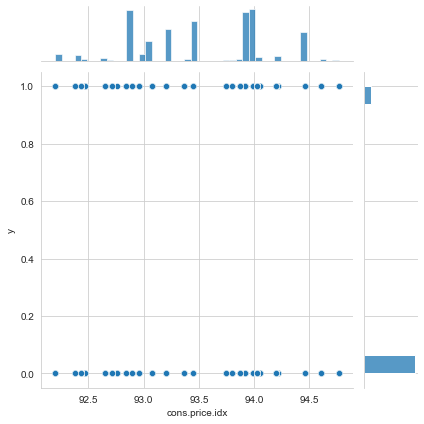

In [35]:
sns.jointplot(data=Data,x=Data['cons.price.idx'],y=Data['y'],kind='scatter')

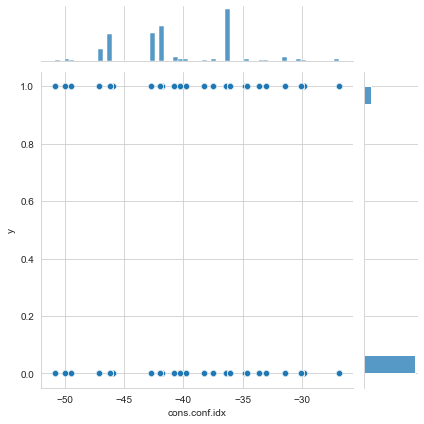

In [36]:
 sns.jointplot(data=Data,x=Data['cons.conf.idx'],y=Data['y'],kind='scatter')

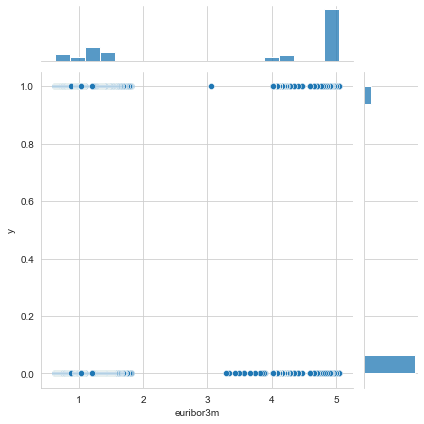

In [37]:
 sns.jointplot(data=Data,x=Data['euribor3m'],y=Data['y'],kind='scatter')

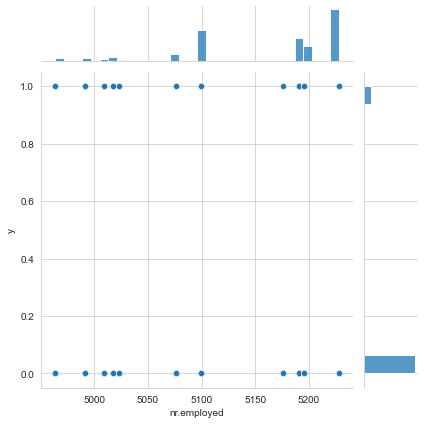

In [38]:
sns.jointplot(data=Data,x=Data['nr.employed'],y=Data['y'],kind='scatter')

In [39]:
# Dropping Day of week And Month of Contact Irrelevant
Data.drop('day_of_week',axis=1,inplace=True)
Data.drop('month',axis=1,inplace=True)

In [40]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30114 entries, 0 to 41186
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30114 non-null  int64  
 1   job             30114 non-null  int64  
 2   education       30114 non-null  int64  
 3   housing         30114 non-null  float64
 4   loan            30114 non-null  float64
 5   duration        30114 non-null  int64  
 6   campaign        30114 non-null  int64  
 7   previous        30114 non-null  int64  
 8   poutcome        30114 non-null  int64  
 9   emp.var.rate    30114 non-null  float64
 10  cons.price.idx  30114 non-null  float64
 11  cons.conf.idx   30114 non-null  float64
 12  euribor3m       30114 non-null  float64
 13  nr.employed     30114 non-null  float64
 14  y               30114 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 4.9 MB


In [42]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] < 25, 'age'] = 0
    dataframe.loc[dataframe['age'] >= 25, 'age'] = 1
           
    return dataframe

age(Data);

Now Data has been Cleaned Lets move on to Data Splitting and Model Selection

# Data Splitting And Model Selection

In [40]:
# Importing Train_Test_Split Model for data Splitting
from sklearn.model_selection import train_test_split

In [41]:
X = Data.drop('y', axis=1)
Y = Data['y']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=101)
# test_size indicate how much portion of data to include in test dataset
# random_state is the seed used by the random number generator

In [42]:
# importing model selection functions
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV # cross Validation method
from sklearn.naive_bayes import GaussianNB

# All Classification Algorithms Used 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Scaleling functions used
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Methods used for Accuracy Check 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

Trying Out All Algorithms on the data set for checking the cross validation score then picking the best algorithm for our task 

In [43]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
n_splits = 5

for name, model in models:
    kfold = model_selection.KFold(n_splits=n_splits, shuffle=True, \
                                  random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, \
                                                 y_train, cv=kfold, \
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR: 89.90 ( 0.27)
LDA: 89.90 ( 0.25)
KNN: 88.81 ( 0.20)
CART: 87.91 ( 0.23)
NB: 82.12 ( 0.53)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

SVM: 87.44 ( 0.39)


LR: 89.90 ( 0.27)

LDA: 89.90 ( 0.25)

KNN: 88.81 ( 0.20)

CART: 87.81 ( 0.32)

SVM: 87.44 ( 0.39)

NB: 82.12 ( 0.53)

As Here Max Accuracy is achieved by Linear Dicremenent Model(LDA) & Linear Regression(LR)

Lets Try This again on Scaled Data

In [44]:
results_df = pd.DataFrame(results, index=names,columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df

,CV1,CV2,CV3,CV4,CV5
LR,0.902277,0.895636,0.901565,0.896110,0.899644
LDA,0.902751,0.896110,0.900617,0.896584,0.898932
KNN,0.891603,0.886148,0.888757,0.886148,0.888019
CART,0.879507,0.880693,0.879507,0.881167,0.874733
NB,0.827087,0.822818,0.824715,0.811670,0.819929
SVM,0.876660,0.868596,0.880218,0.873102,0.873547


In [45]:
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
pd.set_option('precision',2)
results_df*100

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
LR,90.23,89.56,90.16,89.61,89.96,89.90,0.31
LDA,90.28,89.61,90.06,89.66,89.89,89.90,0.28
KNN,89.16,88.61,88.88,88.61,88.80,88.81,0.23
CART,87.95,88.07,87.95,88.12,87.47,87.91,0.26
NB,82.71,82.28,82.47,81.17,81.99,82.12,0.60
SVM,87.67,86.86,88.02,87.31,87.35,87.44,0.43


As We Can see the Precise Accuracy of Models

Trying out same with Scaled Data


### Using StandardScaler() method 
This Method is used to centrallize and Scale the Data Points.

which basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

In [46]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledLDA,90.28,89.61,90.06,89.66,89.89,89.90,0.28
ScaledSVM,90.23,89.21,90.28,89.75,89.92,89.88,0.43
ScaledLR,90.23,89.61,90.11,89.42,89.68,89.81,0.34
ScaledKNN,89.21,88.85,89.14,89.02,89.28,89.10,0.17
ScaledCART,87.78,87.93,87.81,87.48,87.43,87.68,0.22
ScaledNB,82.71,82.28,82.47,81.17,81.99,82.12,0.60


As We Can See That Scaling of data has improved accuracy of few models but LDA remains same with 89.90 +- 0.28 accuracy

#### Lets Try our Luck with the Ensembels
##### What are Ensembels ?
Ensembels are Alogrithms that combine diverse set of learners (individual models) together to improvise on the stability and predictive power of the model.

which means it will take the score of all small models and then collectively learn to get a single best model


SO LETS TRY!!


In [47]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))  
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

,CV1,CV2,CV3,CV4,CV5,CV Mean,CV Std Dev
ScaledGBM,91.13,90.49,91.18,90.56,90.79,90.83,0.32
ScaledAB,90.63,89.63,90.51,89.42,90.46,90.13,0.56
ScaledRF,90.04,89.63,90.04,90.25,90.44,90.08,0.30
ScaledET,89.94,89.68,89.54,89.71,89.21,89.62,0.27


### As From This Method We Have Got A Best method for our problem with Accuracy of 90.84 +- .32

So Now Scaled Gradient Boosting Method Will be Used for or Machine Learning And Prediction 

# Preparing And Training the Model
#### (Gradient Boosting Classifier)

The statistical framework which use boosting as a numerical optimization problem where the objective is to minimize the loss of the model by adding weak learners using a gradient descent like procedure.

This class of algorithms were described as a stage-wise additive model. This is because one new weak learner is added at a time and existing weak learners in the model are frozen and left unchanged.
The generalization allowed arbitrary differentiable loss functions to be used, expanding the technique beyond binary classification problems to support regression, multi-class classification and more.

##### How Gradient Boosting Works
Gradient boosting involves three elements:

A loss function to be optimized.

A weak learner to make predictions.

An additive model to add weak learners to minimize the loss function

-----------------------------------------------------------------------------

A gradient descent procedure is used to minimize the loss when adding trees.

Decision trees are used as the weak learner in gradient boosting.

Trees are added one at a time, and existing trees in the model are not changed.

In [48]:
# Scaling of Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training of Model 

In [49]:
model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
# n_estimators - The number of boosting stages to perform.
# learning_rate - learning rate shrinks the contribution of each tree by value of learning_rate provided.
# max_features - The number of features to consider when looking for the best split.
# max_depth - The maximum depth limits the number of nodes in the tree.
# random_state - random_state is the seed used by the random number generator

In [50]:
# Fitting The Model
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Prediction And Accuracy Of Model 

In [51]:
# Predicting from The Model
predictions = model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report :")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[7796  184]
 [ 694  361]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7980
           1       0.66      0.34      0.45      1055

    accuracy                           0.90      9035
   macro avg       0.79      0.66      0.70      9035
weighted avg       0.89      0.90      0.89      9035



### Confusion Matrix - 

[TP FP]

[FN TN]

True Positive: You predicted positive and it’s true.

True Negative: You predicted negative and it’s true.

False Positive: (Type 1 Error) You predicted positive and it’s false.

False Negative: (Type 2 Error) You predicted negative and it’s false.


### Classification Report - 
class 0 - Not Subscribed

class 1 - Subscribed

precision - 
Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

recall - 
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

f1 score - 
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

support - 
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [52]:
score = model.score(X_test,y_test)
score

0.9028223574986165

 Model is 90.28% Accurate and thats Not Bad!!!

sns.jointplot(x=predictions,y=y_test)

## Fairness

In [43]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [44]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [45]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [46]:
Data.head()

,age,job,education,housing,loan,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,4,1,0.0,0.0,261,1,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,1,8,4,1.0,0.0,226,1,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,1,1,2,0.0,0.0,151,1,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,1,8,4,0.0,1.0,307,1,0,2,1.1,93.994,-36.4,4.857,5191.0,0
6,1,1,6,0.0,0.0,139,1,0,2,1.1,93.994,-36.4,4.857,5191.0,0


In [47]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = StandardDataset(Data,
                                  label_name='y',
                                  protected_attribute_names=['age'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])


In [48]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = 0.101808


In [49]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.ensemble import AdaBoostClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 100

model = AdaBoostClassifier(n_estimators= 1)

mdl = model.fit(X_train, y_train)
with open('../../Results/AdaBoost/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/AdaBoost/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/AdaBoost/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [50]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = AdaBoostClassifier(n_estimators= i)
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


invalid value encountered in double_scalars


In [51]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/AdaBoost/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99
accuracy,0.902712,0.877144,0.886663,0.886663,0.882789,0.884560,0.888213,0.897178,0.897288,0.897288,...,0.902490,0.902601,0.901605,0.902158,0.901716,0.901937,0.901605,0.902048,0.901826,0.902712
f1,0.510306,0.000000,0.252555,0.252555,0.386798,0.323167,0.381127,0.484748,0.485017,0.485017,...,0.506995,0.510022,0.505837,0.506145,0.505568,0.502806,0.505287,0.503088,0.505850,0.510306
statistical_parity_difference,0.098333,0.000000,0.022015,0.022015,0.033001,0.024063,0.030908,0.058743,0.058857,0.058857,...,0.099243,0.093922,0.102176,0.094604,0.106815,0.108407,0.106701,0.104222,0.102631,0.098333
equal_opportunity_difference,0.178437,0.000000,0.033074,0.033074,0.012123,0.048611,0.033781,0.111111,0.111111,0.111111,...,0.161370,0.156662,0.181262,0.161370,0.182203,0.187853,0.182203,0.187853,0.182203,0.178437
average_abs_odds_difference,0.109415,0.000000,0.018960,0.018960,0.011908,0.025342,0.019344,0.060465,0.060530,0.060530,...,0.103758,0.098463,0.113057,0.100881,0.116340,0.119682,0.116275,0.117064,0.113722,0.109415
disparate_impact,0.851462,NaN,0.577067,0.577067,0.398448,0.412936,0.433505,0.577571,0.579085,0.579085,...,0.863962,0.823669,0.870912,0.833000,0.900644,0.922658,0.899090,0.899127,0.877114,0.851462
theil_index,0.084731,0.131084,0.113538,0.113538,0.102039,0.108321,0.101923,0.088433,0.088393,0.088393,...,0.085211,0.084771,0.085376,0.085333,0.085415,0.085813,0.085456,0.085773,0.085375,0.084731
